# Stoks Pet project

## Init

### імпортую бібліотеки

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### завантажую наявні таблиці

In [57]:
df_rtx4070 = pd.read_csv("tables/rtx4070.csv", parse_dates=['week']).rename(columns={'rtx_4070':"rtx_4070_popularity"})
df_rtx4080 = pd.read_csv("tables/rtx4080.csv", parse_dates=['week']).rename(columns={'rtx_4080':"rtx_4080_popularity"})
df_rtx4090 = pd.read_csv("tables/rtx4090.csv", parse_dates=['week']).rename(columns={'rtx_4090':"rtx_4090_popularity"})
df_stocks = pd.read_csv("tables/stock_prices.csv", parse_dates=['date'])

In [58]:
df_rtx4070.head(5)

,week,rtx_4070_popularity
0,2021-12-26,<1
1,2022-01-02,<1
2,2022-01-09,<1
3,2022-01-16,<1
4,2022-01-23,<1


In [59]:
df_rtx4080.head(5)

,week,rtx_4080_popularity
0,2021-12-26,1
1,2022-01-02,2
2,2022-01-09,2
3,2022-01-16,2
4,2022-01-23,2


In [60]:
df_rtx4090.head(5)

,week,rtx_4090_popularity
0,2021-12-26,1
1,2022-01-02,1
2,2022-01-09,1
3,2022-01-16,1
4,2022-01-23,1


In [61]:
df_stocks.head(5)

,ticker,date,open,high,low,close,adj_close,volume
0,NVDA,2022-01-03,29.815001,30.711000,29.785000,30.121000,30.066133,391547000
1,NVDA,2022-01-04,30.277000,30.468000,28.349001,29.290001,29.236649,527154000
2,NVDA,2022-01-05,28.948999,29.416000,27.533001,27.604000,27.553719,498064000
3,NVDA,2022-01-06,27.639999,28.438000,27.065001,28.177999,28.126673,454186000
4,NVDA,2022-01-07,28.141001,28.422001,27.056999,27.247000,27.197369,409939000


### об'єдную таблиці в одну

In [62]:
df_trends = df_rtx4090.merge(df_rtx4080, on=['week'], how='outer').merge(df_rtx4070, on=['week'], how='outer').sort_values('week')
df_trends.tail(5)

,week,rtx_4090_popularity,rtx_4080_popularity,rtx_4070_popularity
154,2024-12-08,22,54,74
155,2024-12-15,21,56,74
156,2024-12-22,23,64,84
157,2024-12-29,22,59,80
158,2025-01-05,45,79,88


In [63]:
df_trends = df_trends.rename(columns={'week': 'date'})
df_trends.head(5)

,date,rtx_4090_popularity,rtx_4080_popularity,rtx_4070_popularity
0,2021-12-26,1,1,<1
1,2022-01-02,1,2,<1
2,2022-01-09,1,2,<1
3,2022-01-16,1,2,<1
4,2022-01-23,1,2,<1


створюю базову колонку з усіма необхідними днями для подальшого об'єднання

In [64]:
all_dates = pd.DataFrame({'date': pd.date_range(df_trends['date'].min(), df_trends['date'].max())})
all_dates.head(5)

,date
0,2021-12-26
1,2021-12-27
2,2021-12-28
3,2021-12-29
4,2021-12-30


об'єдную всі дані. Оскільки таблиця про популярність відеокарт розбивається по тижням, а таблицями з акціями NVIDIA по дням, то в результаті об'єднання виникнуть пусті значення в колонках з популярністю відеокарт. Щоб це виправити заповнюю пусті дані в колонках з популярністю однаковим значенням протагом тижня по всіх днях цього тижня

In [65]:
trend_daily = all_dates.merge(df_trends, on='date', how='left').ffill()
df_origin = df_stocks.merge(trend_daily, on='date', how='left')
df_origin.tail(5)

,ticker,date,open,high,low,close,adj_close,volume,rtx_4090_popularity,rtx_4080_popularity,rtx_4070_popularity
750,NVDA,2024-12-27,138.550003,139.020004,134.710007,137.009995,136.987869,170582600,23.0,64.0,84
751,NVDA,2024-12-30,134.830002,140.270004,134.020004,137.490005,137.467804,167734700,22.0,59.0,80
752,NVDA,2024-12-31,138.029999,138.070007,133.830002,134.289993,134.268326,155659200,22.0,59.0,80
753,NVDA,2025-01-02,136.000000,138.880005,134.630005,138.309998,138.287674,198247200,22.0,59.0,80
754,NVDA,2025-01-03,140.009995,144.899994,139.729996,144.470001,144.446686,229322500,22.0,59.0,80


rtx_4070_popularity має тип int що відрізняється від інших колонок. Також маємо значення <1. Змінимо це значення на 0 та змінимо тип даних

In [66]:
df = df_origin.copy()
df['rtx_4070_popularity'] = df['rtx_4070_popularity'].replace({'<1': 0.0})
df['rtx_4070_popularity'] = df['rtx_4070_popularity'].astype(float)
df['rtx_4070_popularity'].head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: rtx_4070_popularity, dtype: float64

## EDA

### дізнаюся статистичні дані про таблицю

In [67]:
print(df.shape)
df.describe()

(755, 11)


,date,open,high,low,close,adj_close,volume,rtx_4090_popularity,rtx_4080_popularity,rtx_4070_popularity
count,755,755.000000,755.000000,755.000000,755.000000,755.000000,7.550000e+02,755.000000,755.000000,755.000000
mean,2023-07-04 13:21:03.576159232,54.647417,55.664199,53.532205,54.646250,54.618320,4.638991e+08,15.198675,31.781457,31.703311
min,2022-01-03 00:00:00,10.971000,11.735000,10.813000,11.227000,11.214160,1.051570e+08,1.000000,2.000000,0.000000
25%,2022-10-03 12:00:00,19.576500,20.082500,19.023001,19.596999,19.564636,3.622435e+08,12.000000,28.000000,4.000000
50%,2023-07-06 00:00:00,41.750999,42.549999,41.077999,42.101002,42.077106,4.507360e+08,16.000000,34.000000,36.000000
75%,2024-04-04 12:00:00,88.035503,89.909000,86.278503,87.890499,87.855526,5.496925e+08,19.000000,42.000000,49.000000
max,2025-01-03 00:00:00,149.350006,152.889999,146.259995,148.880005,148.845718,1.543911e+09,100.000000,100.000000,100.000000
std,NaN,42.423127,43.118542,41.544147,42.356265,42.352333,1.671663e+08,11.533494,18.973978,25.074995


### ще деяка інформація про наші колонки

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ticker               755 non-null    object        
 1   date                 755 non-null    datetime64[ns]
 2   open                 755 non-null    float64       
 3   high                 755 non-null    float64       
 4   low                  755 non-null    float64       
 5   close                755 non-null    float64       
 6   adj_close            755 non-null    float64       
 7   volume               755 non-null    int64         
 8   rtx_4090_popularity  755 non-null    float64       
 9   rtx_4080_popularity  755 non-null    float64       
 10  rtx_4070_popularity  755 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 65.0+ KB


### значення в кожній колонці

In [69]:
columns = df.columns

for i in columns:
    print(df[i].value_counts())
    print(f'кількість null значень: {sum(df[i].isnull())}')
    print()

ticker
NVDA    755
Name: count, dtype: int64
кількість null значень: 0

date
2025-01-03    1
2022-01-03    1
2022-01-04    1
2022-01-05    1
2022-01-06    1
             ..
2022-02-03    1
2022-02-04    1
2022-02-07    1
2022-02-08    1
2022-02-09    1
Name: count, Length: 755, dtype: int64
кількість null значень: 0

open
21.000000     3
16.020000     2
22.386999     2
27.840000     2
121.769997    2
             ..
138.550003    1
134.830002    1
138.029999    1
136.000000    1
22.011999     1
Name: count, Length: 747, dtype: int64
кількість null значень: 0

high
13.838000     3
28.000000     3
18.118000     2
22.372999     2
27.499001     2
             ..
139.020004    1
140.270004    1
138.070007    1
138.880005    1
139.300003    1
Name: count, Length: 745, dtype: int64
кількість null значень: 0

low
12.105000     2
16.172001     2
17.990000     2
15.389000     2
47.860001     2
             ..
134.710007    1
134.020004    1
133.830002    1
134.630005    1
21.296000     1
Name: c

## Feature Engineering

### Часові агрегати

добуваємо дані, які показують рік, квартал і місяць

In [70]:
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df.head(5)

,ticker,date,open,high,low,close,adj_close,volume,rtx_4090_popularity,rtx_4080_popularity,rtx_4070_popularity,year,quarter,month,month_name
0,NVDA,2022-01-03,29.815001,30.711000,29.785000,30.121000,30.066133,391547000,1.0,2.0,0.0,2022,1,1,January
1,NVDA,2022-01-04,30.277000,30.468000,28.349001,29.290001,29.236649,527154000,1.0,2.0,0.0,2022,1,1,January
2,NVDA,2022-01-05,28.948999,29.416000,27.533001,27.604000,27.553719,498064000,1.0,2.0,0.0,2022,1,1,January
3,NVDA,2022-01-06,27.639999,28.438000,27.065001,28.177999,28.126673,454186000,1.0,2.0,0.0,2022,1,1,January
4,NVDA,2022-01-07,28.141001,28.422001,27.056999,27.247000,27.197369,409939000,1.0,2.0,0.0,2022,1,1,January


Додаємо в таблицю дані по популярності кожного продукту 3, 7, 14 та 30 днів до вказаної в рядку дати

In [71]:
lags = [1,3,7,14,30]
products = ['rtx_4090_popularity', 'rtx_4080_popularity', 'rtx_4070_popularity']

for product in products:
    for lag in lags:
        col_name = f'{product}_lag_{lag}'
        df[col_name] = df[product].shift(lag)

        # для рядків що не мають даних по неохідній даті заповнюємо 0
        df[col_name] = df[col_name].fillna(0)

df.tail(5)

,ticker,date,open,high,low,close,adj_close,volume,rtx_4090_popularity,rtx_4080_popularity,...,rtx_4080_popularity_lag_1,rtx_4080_popularity_lag_3,rtx_4080_popularity_lag_7,rtx_4080_popularity_lag_14,rtx_4080_popularity_lag_30,rtx_4070_popularity_lag_1,rtx_4070_popularity_lag_3,rtx_4070_popularity_lag_7,rtx_4070_popularity_lag_14,rtx_4070_popularity_lag_30
750,NVDA,2024-12-27,138.550003,139.020004,134.710007,137.009995,136.987869,170582600,23.0,64.0,...,64.0,64.0,56.0,61.0,55.0,84.0,84.0,74.0,81.0,74.0
751,NVDA,2024-12-30,134.830002,140.270004,134.020004,137.490005,137.467804,167734700,22.0,59.0,...,64.0,64.0,56.0,54.0,55.0,84.0,84.0,74.0,74.0,74.0
752,NVDA,2024-12-31,138.029999,138.070007,133.830002,134.289993,134.268326,155659200,22.0,59.0,...,59.0,64.0,56.0,54.0,55.0,80.0,84.0,74.0,74.0,74.0
753,NVDA,2025-01-02,136.000000,138.880005,134.630005,138.309998,138.287674,198247200,22.0,59.0,...,59.0,64.0,56.0,54.0,67.0,80.0,84.0,74.0,74.0,82.0
754,NVDA,2025-01-03,140.009995,144.899994,139.729996,144.470001,144.446686,229322500,22.0,59.0,...,59.0,59.0,64.0,54.0,67.0,80.0,80.0,84.0,74.0,82.0


Також додамо дані з volume 3, 7, 14 та 30 днів до вказаної в рядку дати. Можливо ці дані знадобляться, щоб перевіряти гіпотези про активізацію ринку

In [72]:
for lag in lags:
    col_name = f'volume_lag_{lag}'
    df[col_name] = df['volume'].shift(lag)

    # для рядків що не мають даних по неохідній даті заповнюємо 0
    df[col_name] = df[col_name].fillna(0)

df.tail(5)

,ticker,date,open,high,low,close,adj_close,volume,rtx_4090_popularity,rtx_4080_popularity,...,rtx_4070_popularity_lag_1,rtx_4070_popularity_lag_3,rtx_4070_popularity_lag_7,rtx_4070_popularity_lag_14,rtx_4070_popularity_lag_30,volume_lag_1,volume_lag_3,volume_lag_7,volume_lag_14,volume_lag_30
750,NVDA,2024-12-27,138.550003,139.020004,134.710007,137.009995,136.987869,170582600,23.0,64.0,...,84.0,84.0,74.0,81.0,74.0,116205600.0,176053500.0,259410300.0,188505600.0,191903300.0
751,NVDA,2024-12-30,134.830002,140.270004,134.020004,137.490005,137.467804,167734700,22.0,59.0,...,84.0,84.0,74.0,74.0,74.0,170582600.0,105157000.0,277444500.0,189308600.0,194463300.0
752,NVDA,2024-12-31,138.029999,138.070007,133.830002,134.289993,134.268326,155659200,22.0,59.0,...,80.0,84.0,74.0,74.0,74.0,167734700.0,116205600.0,209719200.0,210020900.0,250132900.0
753,NVDA,2025-01-02,136.000000,138.880005,134.630005,138.309998,138.287674,198247200,22.0,59.0,...,80.0,84.0,74.0,74.0,82.0,155659200.0,170582600.0,306528600.0,184905200.0,221866000.0
754,NVDA,2025-01-03,140.009995,144.899994,139.729996,144.470001,144.446686,229322500,22.0,59.0,...,80.0,80.0,84.0,74.0,82.0,198247200.0,167734700.0,176053500.0,159211400.0,227834900.0


### Дохідність

In [73]:
df['returns'] = df['adj_close'].pct_change()
df['returns'] = df['returns'].fillna(0)
df['returns_3d'] = df['adj_close'].pct_change(periods=3)
df['returns_3d'] = df['returns'].fillna(0)
df['returns_7d'] = df['adj_close'].pct_change(periods=7)
df['returns_7d'] = df['returns'].fillna(0)
df['returns_14d'] = df['adj_close'].pct_change(periods=14)
df['returns_14d'] = df['returns'].fillna(0)
df['returns_30d'] = df['adj_close'].pct_change(periods=30)
df['returns_30d'] = df['returns'].fillna(0)
df.tail(5)

,ticker,date,open,high,low,close,adj_close,volume,rtx_4090_popularity,rtx_4080_popularity,...,volume_lag_1,volume_lag_3,volume_lag_7,volume_lag_14,volume_lag_30,returns,returns_3d,returns_7d,returns_14d,returns_30d
750,NVDA,2024-12-27,138.550003,139.020004,134.710007,137.009995,136.987869,170582600,23.0,64.0,...,116205600.0,176053500.0,259410300.0,188505600.0,191903300.0,-0.020868,-0.020868,-0.020868,-0.020868,-0.020868
751,NVDA,2024-12-30,134.830002,140.270004,134.020004,137.490005,137.467804,167734700,22.0,59.0,...,170582600.0,105157000.0,277444500.0,189308600.0,194463300.0,0.003503,0.003503,0.003503,0.003503,0.003503
752,NVDA,2024-12-31,138.029999,138.070007,133.830002,134.289993,134.268326,155659200,22.0,59.0,...,167734700.0,116205600.0,209719200.0,210020900.0,250132900.0,-0.023274,-0.023274,-0.023274,-0.023274,-0.023274
753,NVDA,2025-01-02,136.000000,138.880005,134.630005,138.309998,138.287674,198247200,22.0,59.0,...,155659200.0,170582600.0,306528600.0,184905200.0,221866000.0,0.029935,0.029935,0.029935,0.029935,0.029935
754,NVDA,2025-01-03,140.009995,144.899994,139.729996,144.470001,144.446686,229322500,22.0,59.0,...,198247200.0,167734700.0,176053500.0,159211400.0,227834900.0,0.044538,0.044538,0.044538,0.044538,0.044538


### Урахування дати релізів кожної відеокарти

In [74]:
from datetime import datetime

release_dates = {
    'rtx_4090': pd.to_datetime('2022-10-12'),
    'rtx_4080': pd.to_datetime('2022-11-16'),
    'rtx_4070': pd.to_datetime('2023-04-13'),
}

додаємо колонки, які показують чи дані співпадають з днем/тижднем/місяцем релізу відеокарти

In [75]:
for product, r_date in release_dates.items():
    df[f'is_release_day_{product}'] = (df['date'] == r_date).astype(int)
    df[f'is_release_week_{product}'] = (
        (df['date'] >= r_date - pd.Timedelta(days=3)) &
        (df['date'] <= r_date + pd.Timedelta(days=3))
    ).astype(int)
    df[f'is_release_month_{product}'] = (
        (df['date'].dt.year == r_date.year) &
        (df['date'].dt.month == r_date.month)
    ).astype(int)
df.head(5)

,ticker,date,open,high,low,close,adj_close,volume,rtx_4090_popularity,rtx_4080_popularity,...,returns_30d,is_release_day_rtx_4090,is_release_week_rtx_4090,is_release_month_rtx_4090,is_release_day_rtx_4080,is_release_week_rtx_4080,is_release_month_rtx_4080,is_release_day_rtx_4070,is_release_week_rtx_4070,is_release_month_rtx_4070
0,NVDA,2022-01-03,29.815001,30.711000,29.785000,30.121000,30.066133,391547000,1.0,2.0,...,0.000000,0,0,0,0,0,0,0,0,0
1,NVDA,2022-01-04,30.277000,30.468000,28.349001,29.290001,29.236649,527154000,1.0,2.0,...,-0.027589,0,0,0,0,0,0,0,0,0
2,NVDA,2022-01-05,28.948999,29.416000,27.533001,27.604000,27.553719,498064000,1.0,2.0,...,-0.057562,0,0,0,0,0,0,0,0,0
3,NVDA,2022-01-06,27.639999,28.438000,27.065001,28.177999,28.126673,454186000,1.0,2.0,...,0.020794,0,0,0,0,0,0,0,0,0
4,NVDA,2022-01-07,28.141001,28.422001,27.056999,27.247000,27.197369,409939000,1.0,2.0,...,-0.033040,0,0,0,0,0,0,0,0,0


додаємо колонку, яка показує скільки днів минуло з релізу

In [76]:
for product, r_date in release_dates.items():
    col_name = f'days_since_release_{product}'
    df[col_name] = (df['date'] - r_date).dt.days
    df[col_name] = df[col_name].apply(lambda x: x if x>= 0 else 0)

df.tail(5) 

,ticker,date,open,high,low,close,adj_close,volume,rtx_4090_popularity,rtx_4080_popularity,...,is_release_month_rtx_4090,is_release_day_rtx_4080,is_release_week_rtx_4080,is_release_month_rtx_4080,is_release_day_rtx_4070,is_release_week_rtx_4070,is_release_month_rtx_4070,days_since_release_rtx_4090,days_since_release_rtx_4080,days_since_release_rtx_4070
750,NVDA,2024-12-27,138.550003,139.020004,134.710007,137.009995,136.987869,170582600,23.0,64.0,...,0,0,0,0,0,0,0,807,772,624
751,NVDA,2024-12-30,134.830002,140.270004,134.020004,137.490005,137.467804,167734700,22.0,59.0,...,0,0,0,0,0,0,0,810,775,627
752,NVDA,2024-12-31,138.029999,138.070007,133.830002,134.289993,134.268326,155659200,22.0,59.0,...,0,0,0,0,0,0,0,811,776,628
753,NVDA,2025-01-02,136.000000,138.880005,134.630005,138.309998,138.287674,198247200,22.0,59.0,...,0,0,0,0,0,0,0,813,778,630
754,NVDA,2025-01-03,140.009995,144.899994,139.729996,144.470001,144.446686,229322500,22.0,59.0,...,0,0,0,0,0,0,0,814,779,631


ділимо на часові категорії

In [77]:
bins = [0, 1, 3, 7, 14, 30, float('inf')]
labels = ['0d-1d', '1d-3d', '3d-7d', '7d-14d', '14d-30d', '30d-']

for product in release_dates:
    df[f'release_window_{product}'] = pd.cut(
        df[f'days_since_release_{product}'],
        bins=bins,
        labels=labels,
        include_lowest=True
    )

df.tail(5)

,ticker,date,open,high,low,close,adj_close,volume,rtx_4090_popularity,rtx_4080_popularity,...,is_release_month_rtx_4080,is_release_day_rtx_4070,is_release_week_rtx_4070,is_release_month_rtx_4070,days_since_release_rtx_4090,days_since_release_rtx_4080,days_since_release_rtx_4070,release_window_rtx_4090,release_window_rtx_4080,release_window_rtx_4070
750,NVDA,2024-12-27,138.550003,139.020004,134.710007,137.009995,136.987869,170582600,23.0,64.0,...,0,0,0,0,807,772,624,30d-,30d-,30d-
751,NVDA,2024-12-30,134.830002,140.270004,134.020004,137.490005,137.467804,167734700,22.0,59.0,...,0,0,0,0,810,775,627,30d-,30d-,30d-
752,NVDA,2024-12-31,138.029999,138.070007,133.830002,134.289993,134.268326,155659200,22.0,59.0,...,0,0,0,0,811,776,628,30d-,30d-,30d-
753,NVDA,2025-01-02,136.000000,138.880005,134.630005,138.309998,138.287674,198247200,22.0,59.0,...,0,0,0,0,813,778,630,30d-,30d-,30d-
754,NVDA,2025-01-03,140.009995,144.899994,139.729996,144.470001,144.446686,229322500,22.0,59.0,...,0,0,0,0,814,779,631,30d-,30d-,30d-


## Експортуємо фінальну таблицю

In [87]:
final_df = df.drop(['ticker'], axis=1)
final_df.to_csv('tables/pop_stocks_table.csv')

# PLan

## Correlation

загальний хіт-мап для всіх колонок

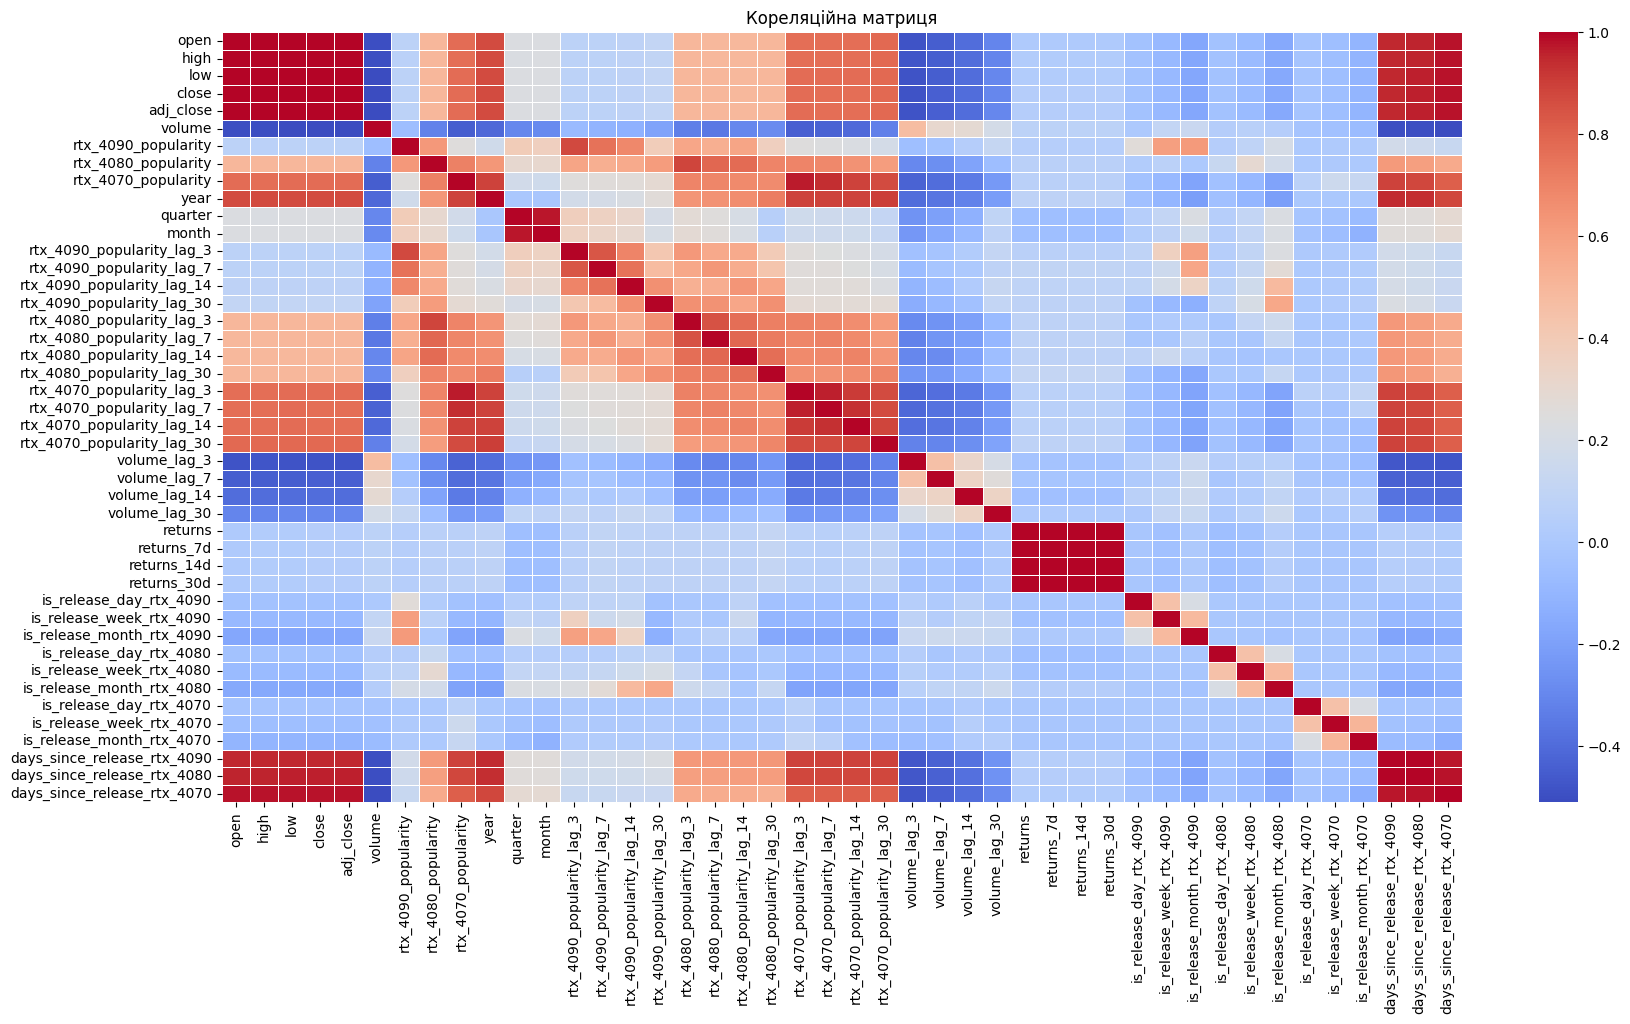

In [ ]:
corr = df.corr(numeric_only=True)

# 2. Побудова теплокарти
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Кореляційна матриця")
plt.show()

кореляції міє певними даними для перевірки гіпотез

In [ ]:
# Stoks Pet project